
# Frontmatter
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/my-blog-post-01) is a link to the source code for this perceptron blog post.

# Under Construction.




# Implementation 
# Under Construction.

In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, let's import some libraries.

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

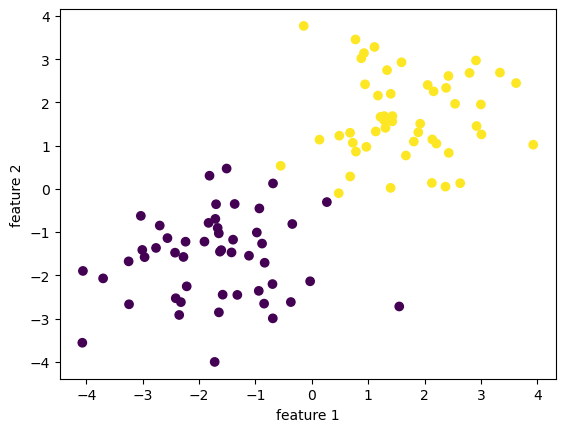

In [113]:
np.random.seed(12345)
n=100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features=p_features-1, centers=[ (-1.7,-1.7), (1.7,1.7) ])

fig=plt.scatter(X[:,0], X[:,1], c=y)
xlab=plt.xlabel("feature 1")
ylab=plt.ylabel("feature 2")



We would like to apply the perceptron algorithm to find the hyperplane that separates those data points, given that they are separable (so perceptron algorithm will converge)

In [114]:
a = np.array([[1,1,1]])
print(a)
print(a[0])


[[1 1 1]]
[1 1 1]


In [115]:
from perceptron import Perceptron

p = Perceptron()
p.fit(X, y, maxiter=10000)

print(p.history[-10:])
print(p.w_)
# print(X)

# print(w)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[39.71808898 55.01564117 -7.        ]


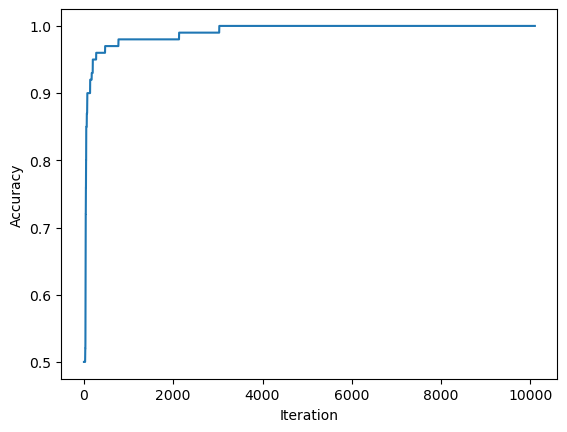

In [116]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

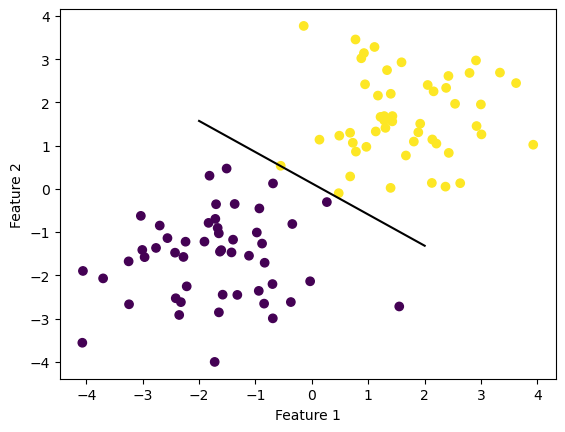

In [117]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w_, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [118]:
print(p.score(X,y))


0.5


In [119]:
print((1<2)*2)
print((1>2)*2)

2
0


In [120]:
print(p.predict(X))
print("\n\n")
print(y)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1
 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0]



[0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1
 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0]


In [121]:
print(p.w_)
print(np.size(p.w_))

[39.71808898 55.01564117 -7.        ]
3


# under construction